# Solving the rise of the reservoir when E is throttled according to $\sqrt{S/Smax}$


# Probem: Solve $\frac{ds}{dt} = p - r x^\lambda$

# For now $\frac{dx}{dt} = p - r x \sqrt{2}$

Chat with ChatGPT:
---

The other day we've been working on the solution of

$dx/dt = p - r x^\lambda$ for $p$, $r$ and $\lambda$ all $> 0$ and $\lambda$ say also $<= 1$.

Let's first focus on $\lambda = 0.5$. I want $x(t)$ for $t>0$ and I want $t(x=1)$ and perhaps also $t(x=0)$ however $x$ should never become 0 because $dx/dt > 0$ for $p \le 0$ and $x\downarrow0$.

For $\lambda=0.5$ there is an exact solution for $x(t)$ implying the lambert function. But I don't know if there is also an exact solution for the hit time $t(x=1)$.

But there are also multiple numerical solutions. I guess the most decent regular one is integration by the Runge Kutta method. Second order may be enough accuracy for me, if not, I'll use a fourth order. But I don't know if finding the hit time $t(x=1)$ and or $t(x=0)$ is readily done with Runge Kutta.

I'm seeking both the analytical an numerical solutions so I can compare them graphically.

Could you help me?

Leuk probleem! Laten we het netjes uit elkaar trekken voor $\lambda=\tfrac12$.

## 1) Exacte oplossing $x(t)$ (Lambert $W$)

Zet $y=\sqrt{x}$ $\Rightarrow$ $x=y^2$. Dan

$$
\frac{dx}{dt}=2y\frac{dy}{dt}=p-r\,y \quad\Longrightarrow\quad 
\frac{dy}{dt}=\frac{p-r\,y}{2y}.
$$

Scheiding van variabelen geeft

$$
\int \frac{2y}{p-r y}\,dy = \int dt
\;\Rightarrow\;
-\frac{2p}{r^2}\ln(p-ry)+\frac{2}{r^2}(p-ry)=t+C.
$$

Schrijf $u=p-ry$. Dan $u-p\ln u=\frac{r^2}{2}(t+C')$. Dit is oplosbaar met Lambert $W$:

$$
u=-p\,W\!\left(-\frac{1}{p}e^{-\frac{1}{p}(u_0 - p\ln u_0) - \frac{r^2}{2p}t}\right),
\quad u_0:=p-r\sqrt{x_0}.
$$

Dus

$$
\boxed{\;
x(t)=\frac{p^2}{r^2}\Bigl[1 + W_k\!\Bigl(-\frac{u_0}{p}\,e^{-u_0/p}\,e^{-\frac{r^2}{2p}t}\Bigr)\Bigr]^2
\;}
$$

met takkeuze $k=0$ (principal branch) als $x_0\le x_*=(p/r)^2$ en $k=-1$ als $x_0> x_*$. De limiet $t\to\infty$ is $x(t)\to (p/r)^2$, de evenwichtswaarde.

## 2) Exacte “hit time” $t(x)$

Je hoeft hier géén Lambert $W$ voor: uit de integraal krijg je direct

$$
\boxed{\;
t(x;\,x_0)=\frac{2}{r^2}\left[(p-r\sqrt{x})-(p-r\sqrt{x_0})-p\ln\left|\frac{p-r\sqrt{x}}{p-r\sqrt{x_0}}\right|\right].
\;}
$$

Speciaal:

* $\displaystyle t\bigl(x=1;\,x_0\bigr)=\frac{2}{r^2}\!\left[(p-r)-(p-r\sqrt{x_0})-p\ln\left|\frac{p-r}{p-r\sqrt{x_0}}\right|\right]$.
* $\displaystyle t\bigl(x\to0^+;\,x_0\bigr)=\frac{2}{r^2}\!\left[r\sqrt{x_0}-p\ln\left(\frac{p}{|p-r\sqrt{x_0}|}\right)\right]$
  (voor $p>0$ en vooruit in de tijd zal $x(t)$ niet naar $0$ gaan; dit is dan een negatieve tijd — “terug in de tijd” vanaf $x_0>0$).

**Bestaan van $t(x=1)$:**
De oplossing beweegt monotoon naar $x_*=(p/r)^2$. Dus:

* Als $x_0<x_*$ en $1\le x_*$, wordt $x=1$ geraakt in eindige tijd (formule hierboven).
* Als $x_0<x_*$ en $1> x_*$, dan wordt $x=1$ nooit bereikt (traject blijft eronder).
* Als $x_0>x_*$ en $1\ge x_*$, dan wordt $x=1$ van bovenaf gekruist.
* Anders niet.

De absolute-waarde in de log maakt de formule geldig aan beide zijden van $x_*$.

## 3) Numeriek (Runge–Kutta) + event-detectie

Voor $\dot x = p - r\sqrt{x}$ werkt een vaste-stap RK2 (Heun of midpoint) prima. Voor de **hittijd** voeg je een eenvoudige event-detectie toe: zodra $ (x_n-1)(x_{n+1}-1)\le 0$, interpoleer je lineair in tijd in dat stapje (of gebruik secant/Newton) om $t(x=1)$ te schatten.

Ik heb een compact Python-script voor je gemaakt dat:

* de **exacte** $x(t)$ (Lambert $W$) tekent,
* de **exacte** hittijd $t(x=1)$ uit de integraal berekent,
* een **RK2 (Heun)**-oplossing maakt met event-detectie,
* en het resultaat grafisch vergelijkt.

Je kunt direct de parameters $p,r,x_0$ aanpassen in het script.
De demonstratie hierboven draait met $p=2$, $r=1$, $x_0=0.01$ en geeft:

* $x_*=(p/r)^2=4$,
* $t_{\text{exact}}(x=1)\approx 0.76741554$,
* $t_{\text{RK2}}(x=1)\approx 0.76739525$ (fout $\approx2.0\cdot10^{-5}$),

en tekent de twee curves over elkaar (zie plot).

Wil je dat ik het script aanpas aan jouw concrete $p,r,x_0$, of ook een RK4-variant en een bisection/nieuwton-refinement voor de hittijd toevoeg?


In [2]:
# Analytical & numerical comparison for dx/dt = p - r * x^(1/2)
# We'll (1) define closed-form x(t) using Lambert W for λ = 1/2,
# (2) define exact hit-time t(x) from the integral,
# (3) implement a simple RK2 (Heun) solver with event detection for x=1,
# and (4) plot and print a comparison for a sample parameter set.
#
# You can change p, r, x0, and t_end below.

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw

def x_exact_lambert(t, p, r, x0):
    """Return relative filling of reservoir.
    
    -------- Exact x(t) for λ = 1/2 using Lambert W --------
    . Valid for real solutions; branch depends on whether x0 is below or above equilibrium.
    . y = sqrt(x), u = p - r y, u0 = p - r sqrt(x0)
    . x(t) = (p^2 / r^2) * [1 + W_k( - (u0/p) * exp( -u0/p - (r^2/(2p)) * t ) )]^2
    """
    y0= math.sqrt(x0)
    u0 = p - r * y0
    
    # choose branch: principal (k=0) if starting below equilibrium; k=-1 if above
    k = 0 if y0 <= p / r else -1
    arg = - (u0 / p) * math.exp(-u0 / p - (r**2 / (2 * p)) * t)
    W = lambertw(arg, k=k)
    
    # ensure real part
    W = float(W.real)
    return (p**2 / r**2) * (1.0 + W) ** 2

def t_hit_exact(x_target, p, r, x0):
    """Return t when reservoir hits a target filling x0.
    . -------- Exact hit time t(x_target) from the integral --------
    . t(y; y0) = (2/r^2) * [ (p - r y) - (p - r y0) - p * ln |(p - r y)/(p - r y0)| ]
    . with y = sqrt(x), y0 = sqrt(x0)
    """
    y = math.sqrt(max(x_target, 0.0))
    y0 = math.sqrt(max(x0, 0.0))
    num = abs(p - r * y)
    den = abs(p - r * y0) if abs(p - r * y0) > 0 else 1e-300  # guard
    return (2.0 / r**2) * ((p - r * y) - (p - r * y0) - p * math.log(num / den))

# -------- RK2 (Heun) with simple event detection for x=1 --------
def f(t, x, p, r):
    return p - r * math.sqrt(max(x, 0.0))

def rk2_heun(p, r, x0, t_end, dt, x_event=1.0):
    t = 0.0
    x = x0
    ts = [t]
    xs = [x]
    t_hit = None
    # Derived steady state
    x_star = (p / r) ** 2


    while t < t_end - 1e-12:
        # Heun's method (improved Euler)
        k1 = f(t, x, p, r)
        x_pred = x + dt * k1
        k2 = f(t + dt, x_pred, p, r)
        x_new = x + (dt / 2.0) * (k1 + k2)
        t_new = t + dt

        # Event detection: check if (x - x_event) changes sign
        if (x - x_event) * (x_new - x_event) <= 0.0 and t_hit is None:
            # Linear interpolation in time between (t,x) and (t_new,x_new)
            if x_new != x:
                alpha = (x_event - x) / (x_new - x)
                t_hit = t + alpha * dt
            else:
                t_hit = t  # degenerate case

        t, x = t_new, x_new
        ts.append(t)
        xs.append(x)

        # If we've passed well beyond steady state tolerance, we can break early
        if abs(x - x_star) < 1e-8 and t_hit is not None:
            break

    return np.array(ts), np.array(xs), t_hit

### Run the solver and compare

Parameters: p = 2.0, r = 1.0, x0 = 0.01
Steady state x* = (p/r)^2 = 4.0
Exact hit time t(x=1) from integral: 0.76741554
RK2 (Heun) estimated t(x=1):         0.76739525
Absolute difference |t_num - t_exact| = 2.029e-05


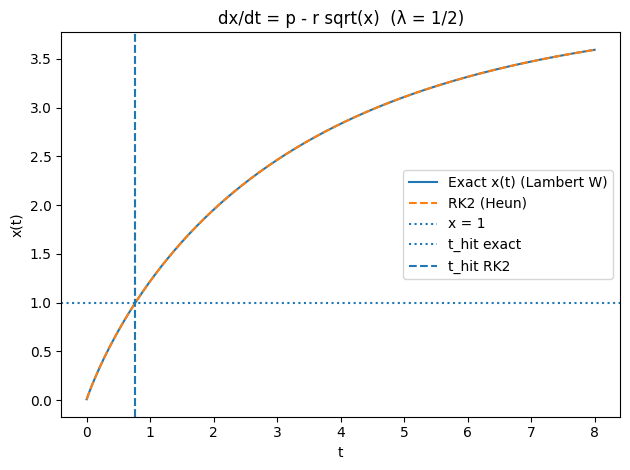

In [3]:
# -------- Parameters (feel free to change) --------
p = 2.0
r = 1.0
x0 = 0.01  # initial condition x(0)=x0 >= 0
t_end = 8.0
dt = 0.01

# Derived steady state
x_star = (p / r) ** 2

ts, xs, t_hit_num = rk2_heun(p, r, x0, t_end, dt, x_event=1.0)

# Compute exact hit time (if meaningful)
t_hit_ex = t_hit_exact(1.0, p, r, x0)

# Build an exact curve using Lambert W if available
t_grid = np.linspace(0.0, t_end, 800)
x_exact_vals = np.array([x_exact_lambert(ti, p, r, x0) for ti in t_grid])

# -------- Print numeric results --------
print("Parameters: p = {}, r = {}, x0 = {}".format(p, r, x0))
print("Steady state x* = (p/r)^2 = {}".format(x_star))
print("Exact hit time t(x=1) from integral: {:.8f}".format(t_hit_ex))
print("RK2 (Heun) estimated t(x=1):         {}".format("None" if t_hit_num is None else f"{t_hit_num:.8f}"))
if t_hit_num is not None:
    print("Absolute difference |t_num - t_exact| = {:.3e}".format(abs(t_hit_num - t_hit_ex)))

# -------- Plot --------
plt.figure()

plt.plot(t_grid, x_exact_vals, label="Exact x(t) (Lambert W)")
plt.plot(ts, xs, linestyle="--", label="RK2 (Heun)")
plt.axhline(1.0, linestyle=":", label="x = 1")
if t_hit_ex is not None and np.isfinite(t_hit_ex):
    plt.axvline(t_hit_ex, linestyle=":", label="t_hit exact")
if t_hit_num is not None:
    plt.axvline(t_hit_num, linestyle="--", label="t_hit RK2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("dx/dt = p - r sqrt(x)  (λ = 1/2)")
plt.legend()
plt.tight_layout()
plt.show()


# Runge Kutta, optimized from the scipy library

This was implementedin rootz_rch_model it works for different lambda, but lambda should not be made smaller than 0.5 to prevent failure of the solver caused by the stiffness of the solution when the root_zone is almost fully emptied by evaporation.
